In [ ]:
## importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
## importando a base de dados
base = pd.read_csv('/content/Base_ScoreCredito_QuantumFinance(1).csv', decimal= ',', sep=';')
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
base.head() ## verificando a base

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,40.09,3,0,0,1,1,778.00
1,708083283,58,M,solteiro,ensino fundam,0,44,1,66.56,3,0,0,1,0,276.30
2,708084558,46,M,divorciado,doutorado,3,35,1,123.68,6,0,0,1,1,401.00
3,708085458,34,F,solteiro,mestrado,0,22,1,19.72,6,0,0,1,0,347.40
4,708086958,49,F,casado,mestrado,2,36,0,0.00,3,1,437,1,2,476.00


In [ ]:
base.drop(columns='id', inplace=True)

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idade                10127 non-null  int64  
 1   sexo                 10127 non-null  object 
 2   estado_civil         10127 non-null  object 
 3   escola               10127 non-null  object 
 4   Qte_dependentes      10127 non-null  int64  
 5   tempo_ultimoservico  10127 non-null  int64  
 6   trabalha             10127 non-null  int64  
 7   vl_salario_mil       10127 non-null  float64
 8   reg_moradia          10127 non-null  int64  
 9   casa_propria         10127 non-null  int64  
 10  vl_imovel_em_mil     10127 non-null  int64  
 11  Qte_cartoes          10127 non-null  int64  
 12  Qte_carros           10127 non-null  int64  
 13  SCORE_CREDITO        10127 non-null  float64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Primeiro vamos tratar os dados

In [ ]:
base.isna().sum() ## verificando dados nulos.

idade                  0
sexo                   0
estado_civil           0
escola                 0
Qte_dependentes        0
tempo_ultimoservico    0
trabalha               0
vl_salario_mil         0
reg_moradia            0
casa_propria           0
vl_imovel_em_mil       0
Qte_cartoes            0
Qte_carros             0
SCORE_CREDITO          0
dtype: int64

In [ ]:
## retirando colunas e linhas com valores vázios.

base.dropna(inplace=True)
base.dropna(axis=1, inplace=True)

## substituindo os estados civis que estão como 'na' para 'solteiro'

base['estado_civil'].replace('na', 'solteiro', inplace=True)

In [ ]:
base.describe()

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,46.33,1.55,34.13,0.91,70.21,3.78,0.35,209.00,1.08,0.62,469.50
std,8.02,1.49,8.22,0.28,55.57,1.58,0.48,378.50,0.33,0.57,133.81
min,26.00,0.00,7.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,162.00
25%,41.00,0.00,30.00,1.00,21.33,3.00,0.00,0.00,1.00,0.00,375.00
50%,46.00,1.00,34.00,1.00,66.49,4.00,0.00,0.00,1.00,1.00,449.60
75%,52.00,3.00,39.00,1.00,107.54,5.00,1.00,289.00,1.00,1.00,540.90
max,73.00,5.00,57.00,1.00,233.30,6.00,1.00,1800.00,4.00,2.00,979.65


## Tratando as variaveis categóricas

In [ ]:
# Converting categorical variables to a dummy indicators

# dummies variable para sexo
sexo_dummies = pd.get_dummies(base['sexo'], prefix = 'Sexo',  dtype=int)

base = pd.concat([base, sexo_dummies], axis=1)

In [ ]:
base.head() ## verificando a base


,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,Sexo_F,Sexo_M
0,45,F,casado,graduacao,3,40,1,40.09,3,0,0,1,1,778.00,1,0
1,58,M,solteiro,ensino fundam,0,44,1,66.56,3,0,0,1,0,276.30,0,1
2,46,M,divorciado,doutorado,3,35,1,123.68,6,0,0,1,1,401.00,0,1
3,34,F,solteiro,mestrado,0,22,1,19.72,6,0,0,1,0,347.40,1,0
4,49,F,casado,mestrado,2,36,0,0.00,3,1,437,1,2,476.00,1,0


In [ ]:
# percebam que aqui estamos excluindo a variável categórica sexo
base.drop(['sexo'], axis=1, inplace=True)
base.drop(['Sexo_M'], axis=1, inplace=True)
display(base.head())

,idade,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,Sexo_F
0,45,casado,graduacao,3,40,1,40.09,3,0,0,1,1,778.00,1
1,58,solteiro,ensino fundam,0,44,1,66.56,3,0,0,1,0,276.30,0
2,46,divorciado,doutorado,3,35,1,123.68,6,0,0,1,1,401.00,0
3,34,solteiro,mestrado,0,22,1,19.72,6,0,0,1,0,347.40,1
4,49,casado,mestrado,2,36,0,0.00,3,1,437,1,2,476.00,1


In [ ]:

# dummies variable para estado_civil
estado_civil_dummies = pd.get_dummies(base['estado_civil'], prefix = 'estado_civil_',  dtype=int)

base = pd.concat([base, estado_civil_dummies], axis=1)

In [ ]:
# dummies variable para escola

escola_dummies = pd.get_dummies(base['escola'], prefix = 'escolaridade_',  dtype=int)

base = pd.concat([base, escola_dummies], axis=1)

In [ ]:
# dummies variable para reg_moradia

reg_dummies = pd.get_dummies(base['reg_moradia'], prefix = 'regia_',  dtype=int)

base = pd.concat([base, reg_dummies], axis=1)

In [ ]:
base.head() ## verificando a base

,idade,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,...,escolaridade__ensino fundam,escolaridade__ensino medio,escolaridade__graduacao,escolaridade__mestrado,regia__1,regia__2,regia__3,regia__4,regia__5,regia__6
0,45,casado,graduacao,3,40,1,40.09,3,0,0,...,0,0,1,0,0,0,1,0,0,0
1,58,solteiro,ensino fundam,0,44,1,66.56,3,0,0,...,1,0,0,0,0,0,1,0,0,0
2,46,divorciado,doutorado,3,35,1,123.68,6,0,0,...,0,0,0,0,0,0,0,0,0,1
3,34,solteiro,mestrado,0,22,1,19.72,6,0,0,...,0,0,0,1,0,0,0,0,0,1
4,49,casado,mestrado,2,36,0,0.00,3,1,437,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
# excluindo as colunas estado_civil, escola e reg_moradia
base.drop(['estado_civil'], axis=1, inplace=True)
base.drop(['escola'], axis=1, inplace=True)
base.drop(['reg_moradia'], axis=1, inplace=True)
display(base.head())

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,...,escolaridade__ensino fundam,escolaridade__ensino medio,escolaridade__graduacao,escolaridade__mestrado,regia__1,regia__2,regia__3,regia__4,regia__5,regia__6
0,45,3,40,1,40.09,0,0,1,1,778.00,...,0,0,1,0,0,0,1,0,0,0
1,58,0,44,1,66.56,0,0,1,0,276.30,...,1,0,0,0,0,0,1,0,0,0
2,46,3,35,1,123.68,0,0,1,1,401.00,...,0,0,0,0,0,0,0,0,0,1
3,34,0,22,1,19.72,0,0,1,0,347.40,...,0,0,0,1,0,0,0,0,0,1
4,49,2,36,0,0.00,1,437,1,2,476.00,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
## mudando o nome das região.

novos_nomes = {
    'regia__1': 'regia__A',
    'regia__2': 'regia__B',
    'regia__3': 'regia__C',
    'regia__4': 'regia__D',
    'regia__5': 'regia__E',
    'regia__6': 'regia__F',

}

base.rename(columns=novos_nomes, inplace=True)

In [ ]:
base.rename(columns={'escolaridade__ensino fundam' : 'escolaridade__ensino_fundam'}, inplace=True)

In [ ]:
base

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,...,escolaridade__ensino_fundam,escolaridade__ensino medio,escolaridade__graduacao,escolaridade__mestrado,regia__A,regia__B,regia__C,regia__D,regia__E,regia__F
0,45,3,40,1,40.09,0,0,1,1,778.00,...,0,0,1,0,0,0,1,0,0,0
1,58,0,44,1,66.56,0,0,1,0,276.30,...,1,0,0,0,0,0,1,0,0,0
2,46,3,35,1,123.68,0,0,1,1,401.00,...,0,0,0,0,0,0,0,0,0,1
3,34,0,22,1,19.72,0,0,1,0,347.40,...,0,0,0,1,0,0,0,0,0,1
4,49,2,36,0,0.00,1,437,1,2,476.00,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,0,45,1,100.13,0,0,1,0,470.00,...,0,0,0,1,0,0,0,1,0,0
10123,38,0,31,1,89.81,0,0,1,1,432.00,...,1,0,0,0,0,0,0,0,0,1
10124,49,3,43,1,19.80,1,252,1,1,406.00,...,0,0,1,0,0,0,1,0,0,0
10125,54,4,48,1,194.78,0,0,1,1,387.00,...,0,1,0,0,0,0,0,1,0,0


## Arrumando os valores de salários

In [ ]:
## convertendo o salario anual para salario por mes e criando uma coluna

salario_mes = base['vl_salario_mil'] / 12
base['salario_mes'] = salario_mes.round(3)

In [ ]:
## arredondando os valores de salario e imoveis

base['vl_salario_mil'] = base['vl_salario_mil'].round(3)
base['vl_imovel_em_mil'] = base['vl_imovel_em_mil'].round(3)

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idade                        10127 non-null  int64  
 1   Qte_dependentes              10127 non-null  int64  
 2   tempo_ultimoservico          10127 non-null  int64  
 3   trabalha                     10127 non-null  int64  
 4   vl_salario_mil               10127 non-null  float64
 5   casa_propria                 10127 non-null  int64  
 6   vl_imovel_em_mil             10127 non-null  int64  
 7   Qte_cartoes                  10127 non-null  int64  
 8   Qte_carros                   10127 non-null  int64  
 9   SCORE_CREDITO                10127 non-null  float64
 10  Sexo_F                       10127 non-null  int64  
 11  estado_civil__casado         10127 non-null  int64  
 12  estado_civil__divorciado     10127 non-null  int64  
 13  estado_civil__so

In [ ]:
base

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,...,escolaridade__ensino medio,escolaridade__graduacao,escolaridade__mestrado,regia__A,regia__B,regia__C,regia__D,regia__E,regia__F,salario_mes
0,45,3,40,1,40.09,0,0,1,1,778.00,...,0,1,0,0,0,1,0,0,0,3.34
1,58,0,44,1,66.56,0,0,1,0,276.30,...,0,0,0,0,0,1,0,0,0,5.55
2,46,3,35,1,123.68,0,0,1,1,401.00,...,0,0,0,0,0,0,0,0,1,10.31
3,34,0,22,1,19.72,0,0,1,0,347.40,...,0,0,1,0,0,0,0,0,1,1.64
4,49,2,36,0,0.00,1,437,1,2,476.00,...,0,0,1,0,0,1,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,0,45,1,100.13,0,0,1,0,470.00,...,0,0,1,0,0,0,1,0,0,8.34
10123,38,0,31,1,89.81,0,0,1,1,432.00,...,0,0,0,0,0,0,0,0,1,7.48
10124,49,3,43,1,19.80,1,252,1,1,406.00,...,0,1,0,0,0,1,0,0,0,1.65
10125,54,4,48,1,194.78,0,0,1,1,387.00,...,1,0,0,0,0,0,1,0,0,16.23


# Vamos realizar a Análise descritiva das variáveis

In [ ]:
base.count() ## contamos os valores

idade                          10127
Qte_dependentes                10127
tempo_ultimoservico            10127
trabalha                       10127
vl_salario_mil                 10127
casa_propria                   10127
vl_imovel_em_mil               10127
Qte_cartoes                    10127
Qte_carros                     10127
SCORE_CREDITO                  10127
Sexo_F                         10127
estado_civil__casado           10127
estado_civil__divorciado       10127
estado_civil__solteiro         10127
escolaridade__doutorado        10127
escolaridade__ensino_fundam    10127
escolaridade__ensino medio     10127
escolaridade__graduacao        10127
escolaridade__mestrado         10127
regia__A                       10127
regia__B                       10127
regia__C                       10127
regia__D                       10127
regia__E                       10127
regia__F                       10127
salario_mes                    10127
dtype: int64

In [ ]:
base.describe().round(1).T

## aqui já podemos obter as principais análises descritivas

,count,mean,std,min,25%,50%,75%,max
idade,10127.00,46.30,8.00,26.00,41.00,46.00,52.00,73.00
Qte_dependentes,10127.00,1.50,1.50,0.00,0.00,1.00,3.00,5.00
tempo_ultimoservico,10127.00,34.10,8.20,7.00,30.00,34.00,39.00,57.00
trabalha,10127.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00
vl_salario_mil,10127.00,70.20,55.60,0.00,21.30,66.50,107.50,233.30
casa_propria,10127.00,0.40,0.50,0.00,0.00,0.00,1.00,1.00
vl_imovel_em_mil,10127.00,209.00,378.50,0.00,0.00,0.00,289.00,1800.00
Qte_cartoes,10127.00,1.10,0.30,1.00,1.00,1.00,1.00,4.00
Qte_carros,10127.00,0.60,0.60,0.00,0.00,1.00,1.00,2.00
SCORE_CREDITO,10127.00,469.50,133.80,162.00,375.00,449.60,540.90,979.60


# Tratando Outliers

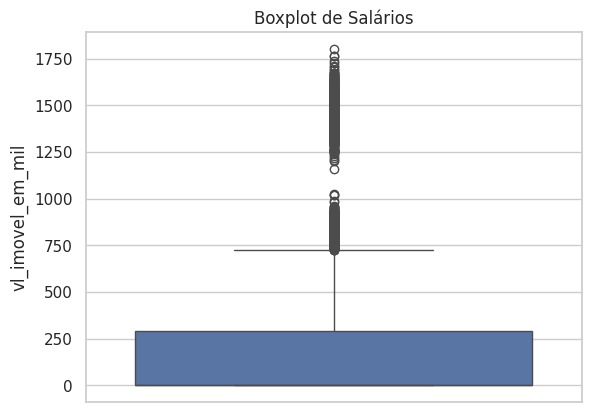

In [ ]:
## aqui notamos muitos outliers em relação a vari

sns.boxplot(y=base['vl_imovel_em_mil'])
plt.title('Boxplot de Salários')
plt.show()

## Criando vários boxplots para verificar os outliers

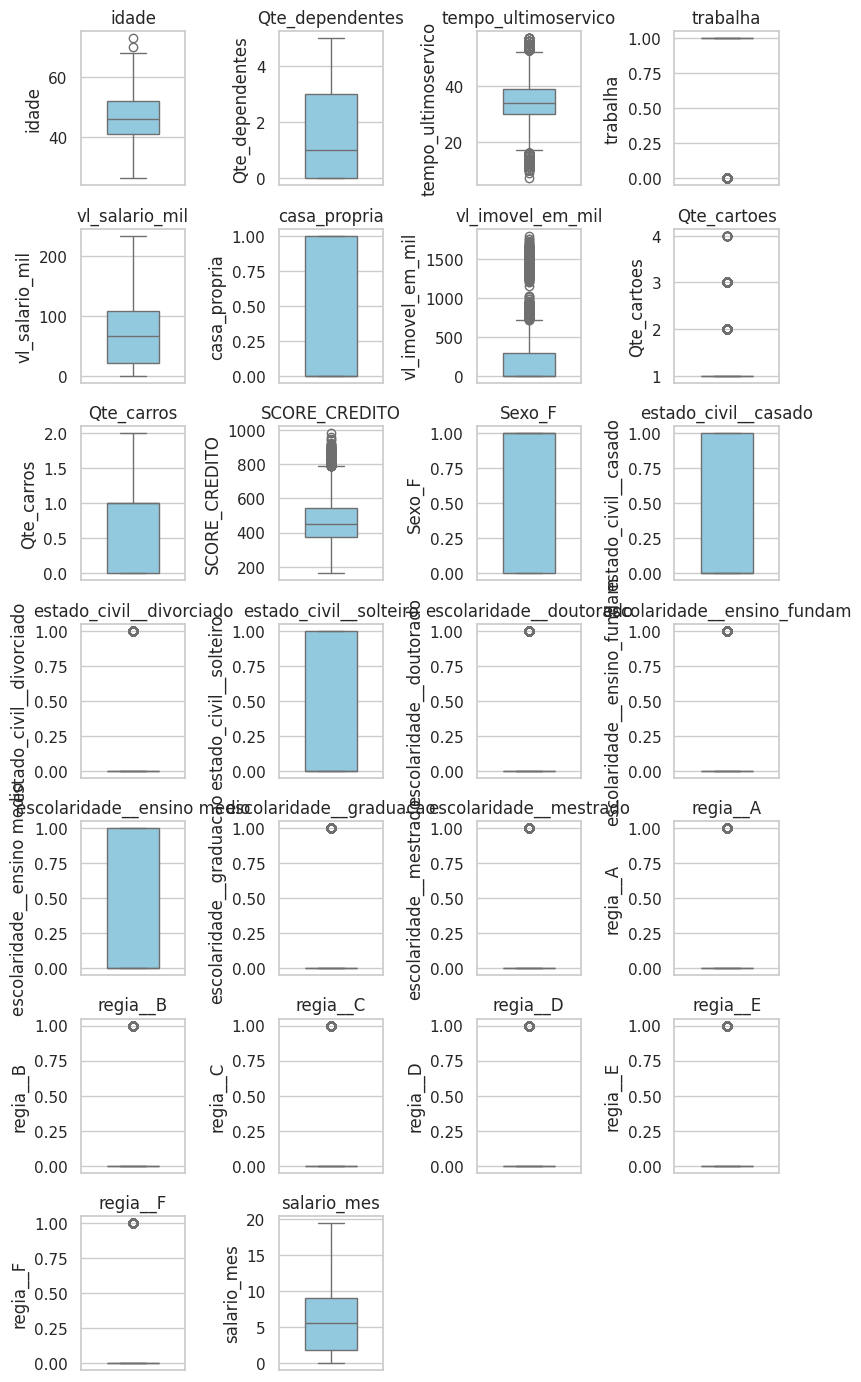

In [ ]:
sns.set(style="whitegrid")

# Calculate the number of columns in the DataFrame
num_cols = len(base.columns)

# Calculate the number of rows needed for subplots
num_rows = (num_cols + 3) // 4  # Round up to the nearest multiple of 4

# Create a figure and axes with enough subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(8, 2 * num_rows))
axes = axes.flatten()  # Flatten the array of axes

# Iterate over the columns and plot boxplots
for i, col in enumerate(base.columns):
    sns.boxplot(y=base[col], ax=axes[i], width=0.5, color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('')

# Hide any unused subplots
for i in range(num_cols, len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

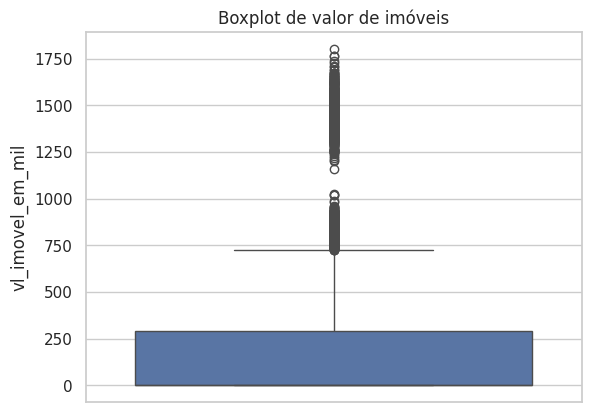

In [ ]:
sns.boxplot(y=base['vl_imovel_em_mil'])
plt.title('Boxplot de valor de imóveis')
plt.show()

In [ ]:

## Tratando os outlier de valor de imóvel

coluna = 'vl_imovel_em_mil'

# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = base[coluna].quantile(0.25)
Q3 = base[coluna].quantile(0.75)
IQR = Q3 - Q1

# Calcular limites inferior e superior para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = base[(base[coluna] < limite_inferior) | (base[coluna] > limite_superior)]
print("Outliers:")
print(outliers)



Outliers:
       idade  Qte_dependentes  tempo_ultimoservico  trabalha  vl_salario_mil  \
9         52                0                   47         1          124.48   
17        41                0                   29         1           37.36   
29        54                1                   35         1          144.20   
30        46                5                   36         1          201.52   
34        44                1                   38         1          197.42   
...      ...              ...                  ...       ...             ...   
10055     42                1                   39         1          134.41   
10092     48                4                   43         1          137.77   
10101     48                3                   49         1           42.30   
10109     51                2                   52         1           40.76   
10110     40                4                   36         1          191.24   

       casa_propria  vl_imove

In [ ]:
# Remover outliers de valor imóvel
base_sem_outliers = base[~((base[coluna] < limite_inferior) | (base[coluna] > limite_superior))]
base_sem_outliers

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,...,escolaridade__ensino medio,escolaridade__graduacao,escolaridade__mestrado,regia__A,regia__B,regia__C,regia__D,regia__E,regia__F,salario_mes
0,45,3,40,1,40.09,0,0,1,1,778.00,...,0,1,0,0,0,1,0,0,0,3.34
1,58,0,44,1,66.56,0,0,1,0,276.30,...,0,0,0,0,0,1,0,0,0,5.55
2,46,3,35,1,123.68,0,0,1,1,401.00,...,0,0,0,0,0,0,0,0,1,10.31
3,34,0,22,1,19.72,0,0,1,0,347.40,...,0,0,1,0,0,0,0,0,1,1.64
4,49,2,36,0,0.00,1,437,1,2,476.00,...,0,0,1,0,0,1,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,0,45,1,100.13,0,0,1,0,470.00,...,0,0,1,0,0,0,1,0,0,8.34
10123,38,0,31,1,89.81,0,0,1,1,432.00,...,0,0,0,0,0,0,0,0,1,7.48
10124,49,3,43,1,19.80,1,252,1,1,406.00,...,0,1,0,0,0,1,0,0,0,1.65
10125,54,4,48,1,194.78,0,0,1,1,387.00,...,1,0,0,0,0,0,1,0,0,16.23


In [ ]:

## Tratando os outlier de SCORE_CREDITO

coluna = 'SCORE_CREDITO'

# Calcular Q1 (25º percentil) e Q3 (75º percentil)
Q1 = base[coluna].quantile(0.25)
Q3 = base[coluna].quantile(0.75)
IQR = Q3 - Q1

# Calcular limites inferior e superior para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = base[(base[coluna] < limite_inferior) | (base[coluna] > limite_superior)]
print("Outliers:")
print(outliers)

Outliers:
       idade  Qte_dependentes  tempo_ultimoservico  trabalha  vl_salario_mil  \
9         52                0                   47         1          124.48   
37        41                3                   36         1          205.64   
65        53                1                   45         1          222.99   
74        35                3                   42         1          107.83   
75        42                4                   36         1          114.89   
...      ...              ...                  ...       ...             ...   
10001     43                2                   45         1          149.64   
10004     56                2                   56         1          229.79   
10026     39                0                   39         1           21.12   
10037     35                2                   36         1          142.87   
10044     45                2                   45         1          211.43   

       casa_propria  vl_imove

In [ ]:
# Remover outliers de score
base_sem_outliers = base[~((base[coluna] < limite_inferior) | (base[coluna] > limite_superior))]
base_sem_outliers

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,...,escolaridade__ensino medio,escolaridade__graduacao,escolaridade__mestrado,regia__A,regia__B,regia__C,regia__D,regia__E,regia__F,salario_mes
0,45,3,40,1,40.09,0,0,1,1,778.00,...,0,1,0,0,0,1,0,0,0,3.34
1,58,0,44,1,66.56,0,0,1,0,276.30,...,0,0,0,0,0,1,0,0,0,5.55
2,46,3,35,1,123.68,0,0,1,1,401.00,...,0,0,0,0,0,0,0,0,1,10.31
3,34,0,22,1,19.72,0,0,1,0,347.40,...,0,0,1,0,0,0,0,0,1,1.64
4,49,2,36,0,0.00,1,437,1,2,476.00,...,0,0,1,0,0,1,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,0,45,1,100.13,0,0,1,0,470.00,...,0,0,1,0,0,0,1,0,0,8.34
10123,38,0,31,1,89.81,0,0,1,1,432.00,...,0,0,0,0,0,0,0,0,1,7.48
10124,49,3,43,1,19.80,1,252,1,1,406.00,...,0,1,0,0,0,1,0,0,0,1.65
10125,54,4,48,1,194.78,0,0,1,1,387.00,...,1,0,0,0,0,0,1,0,0,16.23


In [ ]:
## diferença de valores sem os outliers

print(base.shape)
print(base_sem_outliers.shape)

(10127, 26)
(9879, 26)


# Separando númericos e qualitativos

In [ ]:
base_numericos = base_sem_outliers[['SCORE_CREDITO', 'salario_mes', 'vl_imovel_em_mil', 'idade', 'tempo_ultimoservico', 'Qte_dependentes', 'Qte_cartoes', 'Qte_carros' ]]
base_numericos

,SCORE_CREDITO,salario_mes,vl_imovel_em_mil,idade,tempo_ultimoservico,Qte_dependentes,Qte_cartoes,Qte_carros
0,778.00,3.34,0,45,40,3,1,1
1,276.30,5.55,0,58,44,0,1,0
2,401.00,10.31,0,46,35,3,1,1
3,347.40,1.64,0,34,22,0,1,0
4,476.00,0.00,437,49,36,2,1,2
...,...,...,...,...,...,...,...,...
10122,470.00,8.34,0,50,45,0,1,0
10123,432.00,7.48,0,38,31,0,1,1
10124,406.00,1.65,252,49,43,3,1,1
10125,387.00,16.23,0,54,48,4,1,1


In [ ]:
print(base_numericos.var()) ## verificando a variância dos dados

SCORE_CREDITO          14879.02
salario_mes               20.58
vl_imovel_em_mil      119367.21
idade                     64.53
tempo_ultimoservico       66.06
Qte_dependentes            2.22
Qte_cartoes                0.10
Qte_carros                 0.32
dtype: float64


In [ ]:
# Amplitude dos dados
range_values = base_numericos.max() - base_numericos.min()
print(range_values)

SCORE_CREDITO          627.00
salario_mes             18.74
vl_imovel_em_mil      1763.00
idade                   47.00
tempo_ultimoservico     50.00
Qte_dependentes          5.00
Qte_cartoes              3.00
Qte_carros               2.00
dtype: float64


# Gráficos e Análises

Credit Score variam de 300 a 850, onde uma pontuação mais alta indica menor risco de inadimplência.

Definição de Inadimplência: Estabelecimento de um limite de pontuação abaixo do qual um indivíduo é considerado de alto risco. Por exemplo, indivíduos com uma pontuação abaixo de 600 podem ser considerados de alto risco de inadimplência.

In [ ]:
## media com outliers

print('média da variável SCORE_CREDITO', np.mean(base['SCORE_CREDITO']))
print('desvio da variável SCORE_CREDITO', np.std(base['SCORE_CREDITO']))

média da variável SCORE_CREDITO 469.5003638787401
desvio da variável SCORE_CREDITO 133.8080456278093


In [ ]:
## media sem outliers

print('média da variável SCORE_CREDITO', np.mean(base_sem_outliers['SCORE_CREDITO']))
print('desvio da variável SCORE_CREDITO', np.std(base_sem_outliers['SCORE_CREDITO']))

média da variável SCORE_CREDITO 460.3169030266222
desvio da variável SCORE_CREDITO 121.97339805483544


## Distribuições

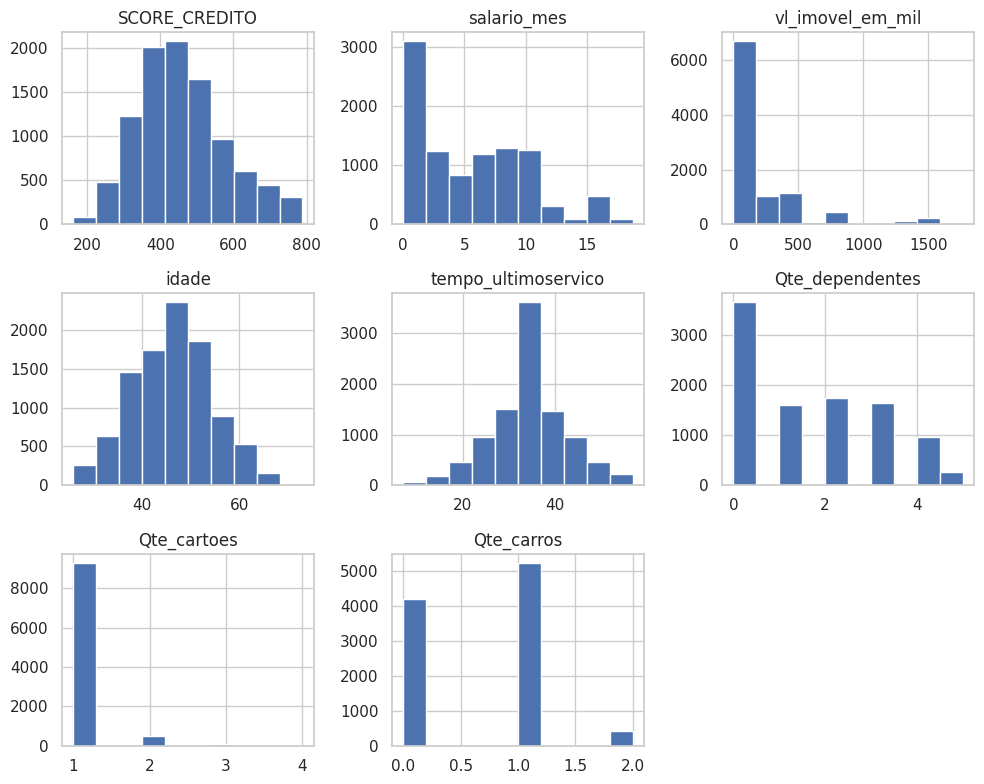

In [ ]:
base_numericos.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

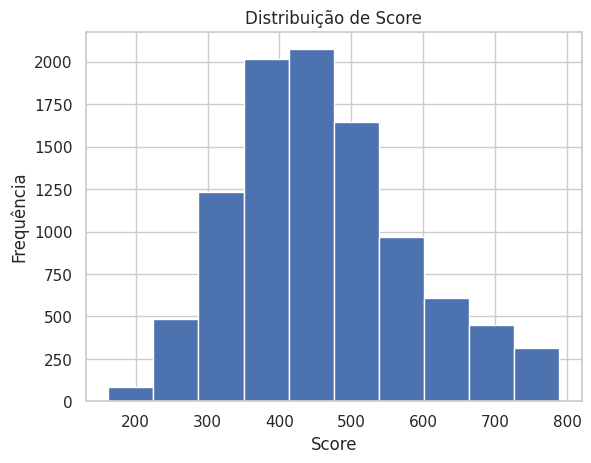

In [ ]:
## Podemos ver visualmente que a maior parte da população tem um Score entre 400 à 500.
base_sem_outliers['SCORE_CREDITO'].hist()
plt.title('Distribuição de Score')
plt.xlabel('Score')
plt.ylabel('Frequência')
plt.show()

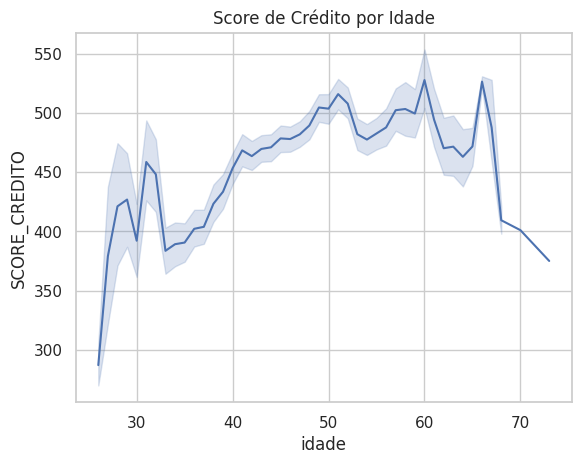

In [ ]:
# Criando um gráfico de linha.

## verificando visualmente o score por idade.

sns.lineplot(data=base, x='idade', y='SCORE_CREDITO')
plt.title('Score de Crédito por Idade')
plt.show()

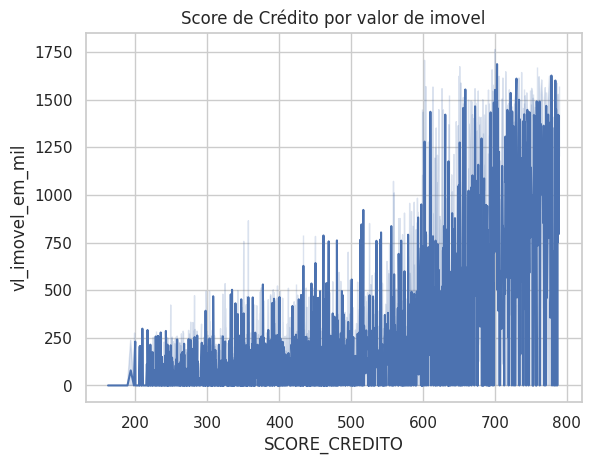

In [ ]:
## Identificamos que individuos com imoveis de alto valor tendem a ter um score melhor

sns.lineplot(data=base_sem_outliers, x='SCORE_CREDITO', y='vl_imovel_em_mil')
plt.title('Score de Crédito por valor de imovel')
plt.show()

Text(0, 0.5, 'salario_mes')

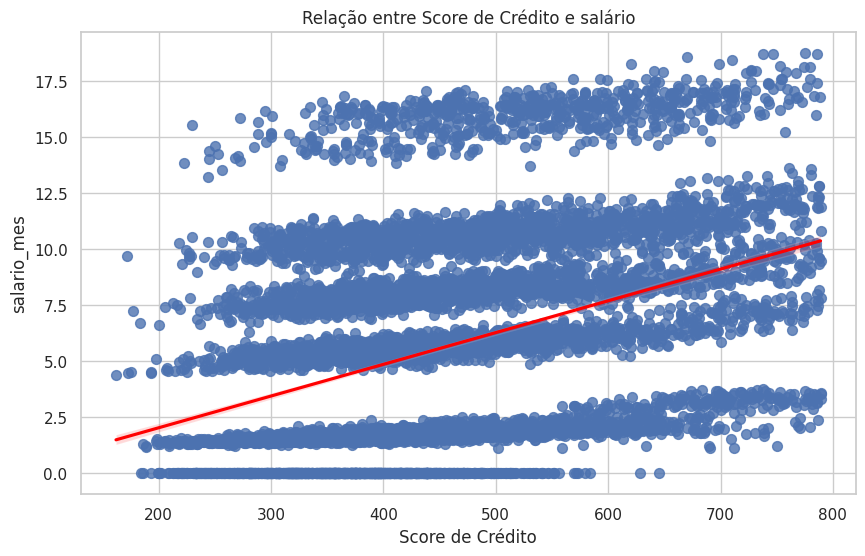

In [ ]:
plt.figure(figsize=(10, 6))

# Criar o gráfico de dispersão
sns.regplot(x='SCORE_CREDITO', y='salario_mes', data=base_sem_outliers, scatter_kws={"s": 50}, line_kws={"color": "red"})

# Adicionar título e rótulos aos eixos
plt.title('Relação entre Score de Crédito e salário')
plt.xlabel('Score de Crédito')
plt.ylabel('salario_mes')

## Análises de dados qualitativos binários

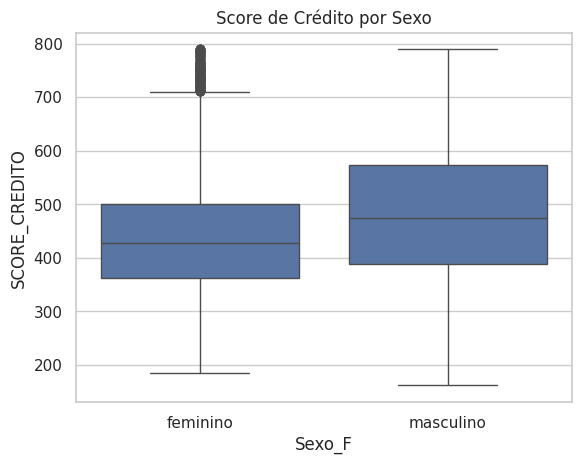

In [ ]:
# Boxplot para variáveis numéricas

# Criando o gráfico com seaborn, mapeando os valores de Sexo_M diretamente no parâmetro x.

## aqui identificamos visualmente a diferença de score por sexo.

sns.boxplot(x=base_sem_outliers['Sexo_F'].map({1: 'feminino', 0: 'masculino'}), y='SCORE_CREDITO', data=base_sem_outliers)
plt.title('Score de Crédito por Sexo')
plt.show()

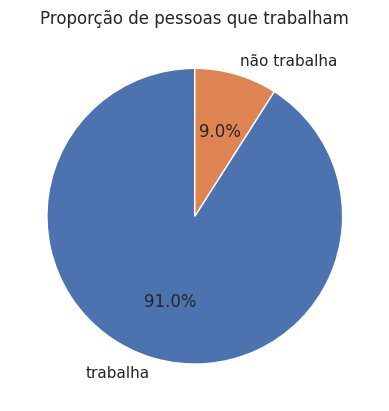

In [ ]:
## gráfico de pizza.

base_sem_outliers['trabalha'].map({1: 'trabalha', 0: 'não trabalha'}).value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proporção de pessoas que trabalham')
plt.ylabel('')
plt.show()

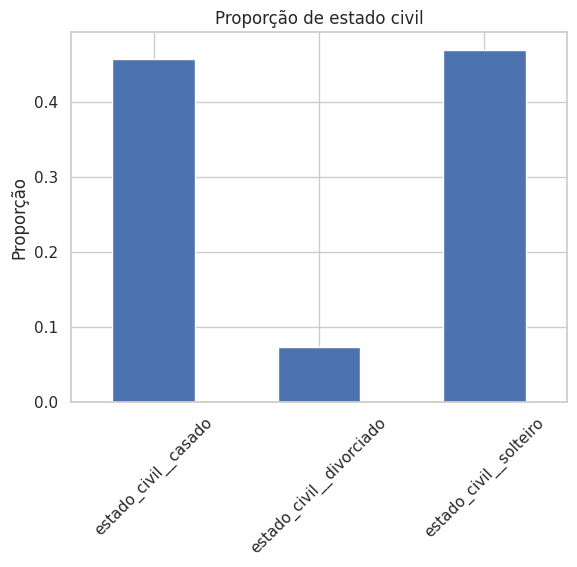

In [ ]:
# Codificar variáveis binárias
dados_binarios = base_sem_outliers.copy()
dados_binarios['estado_civil__casado'] = base_sem_outliers['estado_civil__casado'].astype(int)
dados_binarios['estado_civil__divorciado'] = base_sem_outliers['estado_civil__divorciado'].astype(int)
dados_binarios['estado_civil__solteiro'] = base_sem_outliers['estado_civil__solteiro'].astype(int)

# Calcular proporções
# Use a list to select multiple columns
proporcoes = base_sem_outliers[['estado_civil__casado', 'estado_civil__divorciado', 'estado_civil__solteiro']].mean()

# Gráfico de Barras Empilhadas
proporcoes.plot(kind='bar', stacked=True)
plt.title('Proporção de estado civil')
plt.ylabel('Proporção')
plt.xticks(rotation=45)
plt.show()

In [ ]:
## Frequências e Proporções: Calcular a frequência e a proporção de cada categoria binária

frequencia_trabalha = base_sem_outliers['trabalha'].value_counts()
proporcao_strabalha = base_sem_outliers['trabalha'].value_counts(normalize=True)

print(frequencia_trabalha)
print(proporcao_strabalha)

trabalha
1    8987
0     892
Name: count, dtype: int64
trabalha
1   0.91
0   0.09
Name: proportion, dtype: float64


In [ ]:
## Teste de Proporção: Usado para comparar proporções entre grupos
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# Contagens
contagem_masculino = (base_sem_outliers['Sexo_F'] == 1).sum()
contagem_feminino = (base_sem_outliers['Sexo_F'] == 0).sum()
carro_masculino = ((base_sem_outliers['Sexo_F'] == 1) & (base_sem_outliers['casa_propria'] == 1)).sum()
carro_feminino = ((base_sem_outliers['Sexo_F'] == 0) & (base_sem_outliers['casa_propria'] == 1)).sum()

# Teste de proporção
proporcao_test = proportions_ztest([carro_masculino, carro_feminino], [contagem_masculino, contagem_feminino])

print(f"Estatística Z: {proporcao_test[0]}, p-valor: {proporcao_test[1]}")

Estatística Z: -0.05607419720659792, p-valor: 0.9552826992341797


# Correlação de Pearson

In [ ]:
# verificando a correlação entre as váriaveis númericas

corr = base_numericos.corr(method='pearson')
corr

,SCORE_CREDITO,salario_mes,vl_imovel_em_mil,idade,tempo_ultimoservico,Qte_dependentes,Qte_cartoes,Qte_carros
SCORE_CREDITO,1.00,0.38,0.48,0.23,0.35,0.09,0.27,0.25
salario_mes,0.38,1.00,0.09,0.09,0.11,0.04,0.09,-0.01
vl_imovel_em_mil,0.48,0.09,1.00,-0.04,0.03,0.07,0.12,-0.00
idade,0.23,0.09,-0.04,1.00,0.78,-0.07,-0.02,0.05
tempo_ultimoservico,0.35,0.11,0.03,0.78,1.00,-0.06,0.02,-0.03
Qte_dependentes,0.09,0.04,0.07,-0.07,-0.06,1.00,-0.02,0.17
Qte_cartoes,0.27,0.09,0.12,-0.02,0.02,-0.02,1.00,-0.02
Qte_carros,0.25,-0.01,-0.00,0.05,-0.03,0.17,-0.02,1.00


Text(0.5, 1.0, 'Análise de Correlação')

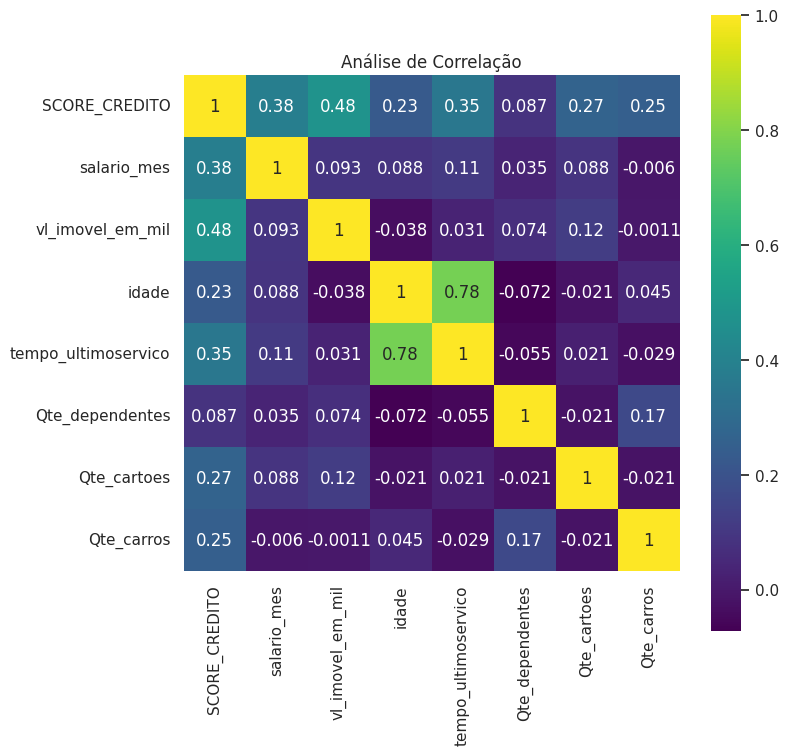

In [ ]:
correlation = base_numericos.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Análise de Correlação')

Text(0.5, 1.0, 'Análise de Correlação')

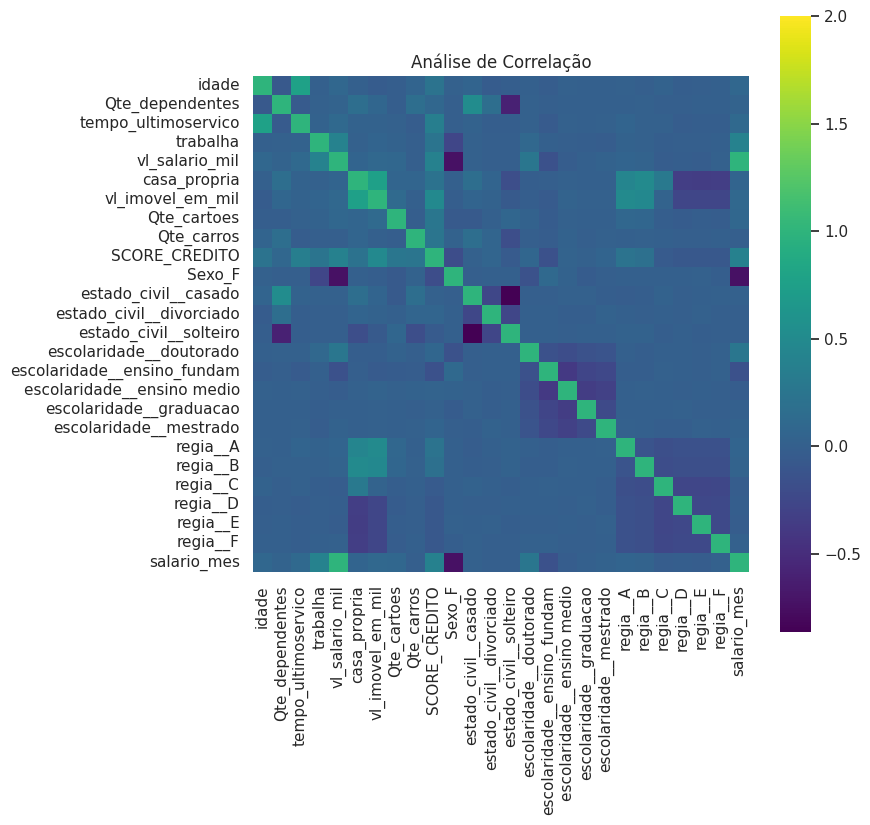

In [ ]:
correlation = base_sem_outliers.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, vmax=2, square=True,annot=False,cmap='viridis')

plt.title('Análise de Correlação')

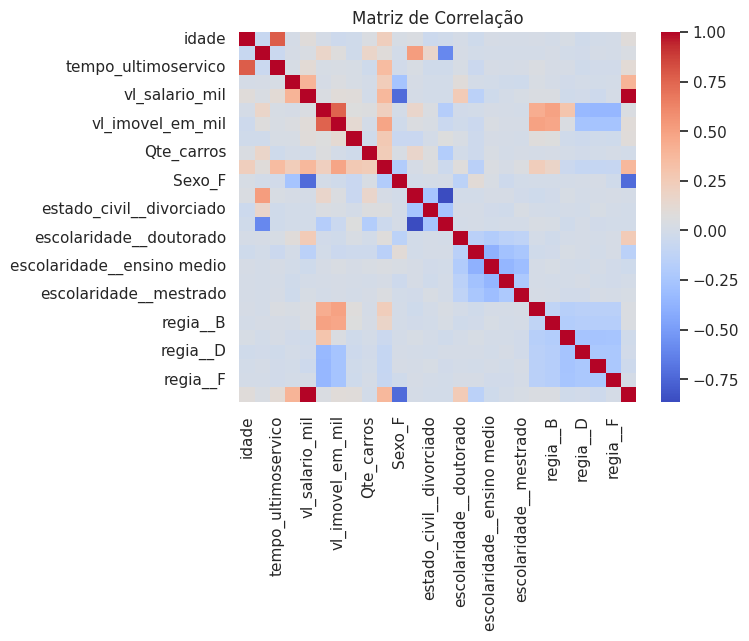

<Figure size 1000x1200 with 0 Axes>

In [ ]:
corr = base_sem_outliers.corr()

# Heatmap da Matriz de Correlação
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.figure(figsize=(10, 12))
plt.show()

In [ ]:
corr

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,...,escolaridade__ensino medio,escolaridade__graduacao,escolaridade__mestrado,regia__A,regia__B,regia__C,regia__D,regia__E,regia__F,salario_mes
idade,1.00,-0.07,0.78,0.01,0.09,0.00,-0.04,-0.02,0.05,0.23,...,0.01,0.01,0.01,0.01,-0.00,0.02,-0.02,-0.01,-0.00,0.09
Qte_dependentes,-0.07,1.00,-0.06,0.02,0.04,0.16,0.07,-0.02,0.17,0.09,...,0.00,-0.00,0.00,0.00,0.01,-0.01,-0.01,0.01,0.00,0.04
tempo_ultimoservico,0.78,-0.06,1.00,0.02,0.11,0.02,0.03,0.02,-0.03,0.35,...,0.02,0.01,0.01,0.04,0.02,0.01,-0.03,-0.02,-0.02,0.11
trabalha,0.01,0.02,0.02,1.00,0.40,0.02,0.05,0.02,-0.00,0.24,...,-0.01,-0.02,-0.03,0.03,0.01,-0.02,-0.00,-0.01,0.00,0.40
vl_salario_mil,0.09,0.04,0.11,0.40,1.00,0.04,0.09,0.09,-0.01,0.38,...,-0.03,0.00,0.02,0.05,0.04,-0.02,-0.02,-0.03,0.01,1.00
casa_propria,0.00,0.16,0.02,0.02,0.04,1.00,0.76,0.06,0.06,0.22,...,0.01,0.01,-0.00,0.44,0.49,0.30,-0.34,-0.35,-0.35,0.04
vl_imovel_em_mil,-0.04,0.07,0.03,0.05,0.09,0.76,1.00,0.12,-0.00,0.48,...,0.03,0.02,0.01,0.49,0.48,0.04,-0.26,-0.26,-0.26,0.09
Qte_cartoes,-0.02,-0.02,0.02,0.02,0.09,0.06,0.12,1.00,-0.02,0.27,...,0.02,0.01,-0.00,0.08,0.07,-0.02,-0.04,-0.02,-0.03,0.09
Qte_carros,0.05,0.17,-0.03,-0.00,-0.01,0.06,-0.00,-0.02,1.00,0.25,...,0.03,-0.00,0.01,0.01,0.01,0.00,-0.01,-0.01,0.01,-0.01
SCORE_CREDITO,0.23,0.09,0.35,0.24,0.38,0.22,0.48,0.27,0.25,1.00,...,0.04,0.01,0.05,0.23,0.18,-0.05,-0.09,-0.09,-0.08,0.38


Correlação de Pearson - quando as variáveis são núméricas quantitativas

ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;

ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;

ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;

ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;

ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.


In [ ]:
##Correlações fracas

results = [(index, col) for index, row in corr.iterrows() for col, value in row.items() if 0.5 > value > 0.3]

print(results)

[('idade', 'trabalha'), ('idade', 'vl_salario_mil'), ('idade', 'casa_propria'), ('idade', 'Qte_carros'), ('idade', 'SCORE_CREDITO'), ('idade', 'Sexo_F'), ('idade', 'estado_civil__casado'), ('idade', 'escolaridade__doutorado'), ('idade', 'escolaridade__ensino medio'), ('idade', 'escolaridade__graduacao'), ('idade', 'escolaridade__mestrado'), ('idade', 'regia__A'), ('idade', 'regia__C'), ('idade', 'salario_mes'), ('Qte_dependentes', 'trabalha'), ('Qte_dependentes', 'vl_salario_mil'), ('Qte_dependentes', 'casa_propria'), ('Qte_dependentes', 'vl_imovel_em_mil'), ('Qte_dependentes', 'Qte_carros'), ('Qte_dependentes', 'SCORE_CREDITO'), ('Qte_dependentes', 'estado_civil__divorciado'), ('Qte_dependentes', 'escolaridade__doutorado'), ('Qte_dependentes', 'escolaridade__ensino medio'), ('Qte_dependentes', 'escolaridade__mestrado'), ('Qte_dependentes', 'regia__A'), ('Qte_dependentes', 'regia__B'), ('Qte_dependentes', 'regia__E'), ('Qte_dependentes', 'regia__F'), ('Qte_dependentes', 'salario_mes'),

In [ ]:
##Correlações moderadas

results = [(index, col) for index, row in corr.iterrows() for col, value in row.items() if 0.7 > value > 0.5]

print(results)

[('tempo_ultimoservico', 'SCORE_CREDITO'), ('trabalha', 'vl_salario_mil'), ('trabalha', 'salario_mes'), ('vl_salario_mil', 'trabalha'), ('vl_salario_mil', 'SCORE_CREDITO'), ('casa_propria', 'regia__A'), ('casa_propria', 'regia__B'), ('vl_imovel_em_mil', 'SCORE_CREDITO'), ('vl_imovel_em_mil', 'regia__A'), ('vl_imovel_em_mil', 'regia__B'), ('SCORE_CREDITO', 'tempo_ultimoservico'), ('SCORE_CREDITO', 'vl_salario_mil'), ('SCORE_CREDITO', 'vl_imovel_em_mil'), ('SCORE_CREDITO', 'salario_mes'), ('regia__A', 'casa_propria'), ('regia__A', 'vl_imovel_em_mil'), ('regia__B', 'casa_propria'), ('regia__B', 'vl_imovel_em_mil'), ('salario_mes', 'trabalha'), ('salario_mes', 'SCORE_CREDITO')]


In [ ]:
##Correlações fortes

results = [(index, col) for index, row in corr.iterrows() for col, value in row.items() if 0.9 > value > 0.7]

print(results)

[('Qte_dependentes', 'estado_civil__casado'), ('estado_civil__casado', 'Qte_dependentes')]


In [ ]:
##Correlações muito fortes

results = [(index, col) for index, row in corr.iterrows() for col, value in row.items() if value > 0.9]

print(results)

[('idade', 'idade'), ('Qte_dependentes', 'Qte_dependentes'), ('tempo_ultimoservico', 'tempo_ultimoservico'), ('trabalha', 'trabalha'), ('vl_salario_mil', 'vl_salario_mil'), ('vl_salario_mil', 'salario_mes'), ('casa_propria', 'casa_propria'), ('vl_imovel_em_mil', 'vl_imovel_em_mil'), ('Qte_cartoes', 'Qte_cartoes'), ('Qte_carros', 'Qte_carros'), ('SCORE_CREDITO', 'SCORE_CREDITO'), ('Sexo_F', 'Sexo_F'), ('estado_civil__casado', 'estado_civil__casado'), ('estado_civil__divorciado', 'estado_civil__divorciado'), ('estado_civil__solteiro', 'estado_civil__solteiro'), ('escolaridade__doutorado', 'escolaridade__doutorado'), ('escolaridade__ensino_fundam', 'escolaridade__ensino_fundam'), ('escolaridade__ensino medio', 'escolaridade__ensino medio'), ('escolaridade__graduacao', 'escolaridade__graduacao'), ('escolaridade__mestrado', 'escolaridade__mestrado'), ('regia__A', 'regia__A'), ('regia__B', 'regia__B'), ('regia__C', 'regia__C'), ('regia__D', 'regia__D'), ('regia__E', 'regia__E'), ('regia__F',

In [ ]:
base_sem_outliers.head()

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,...,escolaridade__ensino medio,escolaridade__graduacao,escolaridade__mestrado,regia__A,regia__B,regia__C,regia__D,regia__E,regia__F,salario_mes
0,45,3,40,1,40.09,0,0,1,1,778.00,...,0,1,0,0,0,1,0,0,0,3.34
1,58,0,44,1,66.56,0,0,1,0,276.30,...,0,0,0,0,0,1,0,0,0,5.55
2,46,3,35,1,123.68,0,0,1,1,401.00,...,0,0,0,0,0,0,0,0,1,10.31
3,34,0,22,1,19.72,0,0,1,0,347.40,...,0,0,1,0,0,0,0,0,1,1.64
4,49,2,36,0,0.00,1,437,1,2,476.00,...,0,0,1,0,0,1,0,0,0,0.00


# Qui-quadrado

In [ ]:
# Criar uma variável categórica
##Separando pelos percentiles

Q1 =  np.percentile(base_sem_outliers['SCORE_CREDITO'], 25)
Q2 =  np.percentile(base_sem_outliers['SCORE_CREDITO'], 50)
Q3 =  np.percentile(base_sem_outliers['SCORE_CREDITO'], 75)
maximo = max(base_sem_outliers['SCORE_CREDITO'])
print(Q1, Q2, Q3, maximo)

373.0 446.0 532.8 789.0


In [ ]:
## criando a faixa categorica

base_sem_outliers.loc[(base_sem_outliers.SCORE_CREDITO >= 0) & (base_sem_outliers.SCORE_CREDITO <= Q1), 'fx_total']=1.0
base_sem_outliers.loc[(base_sem_outliers.SCORE_CREDITO > Q1) & (base_sem_outliers.SCORE_CREDITO <= Q2), 'fx_total']=2.0
base_sem_outliers.loc[(base_sem_outliers.SCORE_CREDITO>  Q2)  & (base_sem_outliers.SCORE_CREDITO <=Q3), 'fx_total']=3.0
base_sem_outliers.loc[(base_sem_outliers.SCORE_CREDITO >  Q3) & (base_sem_outliers.SCORE_CREDITO <= maximo), 'fx_total']=4.0

<ipython-input-224-ed65cfffb044>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_sem_outliers.loc[(base_sem_outliers.SCORE_CREDITO >= 0) & (base_sem_outliers.SCORE_CREDITO <= Q1), 'fx_total']=1.0


<ipython-input-229-c8258e460692>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fx_total', y='SCORE_CREDITO', data=base_sem_outliers, palette='hls')


<Axes: xlabel='fx_total', ylabel='SCORE_CREDITO'>

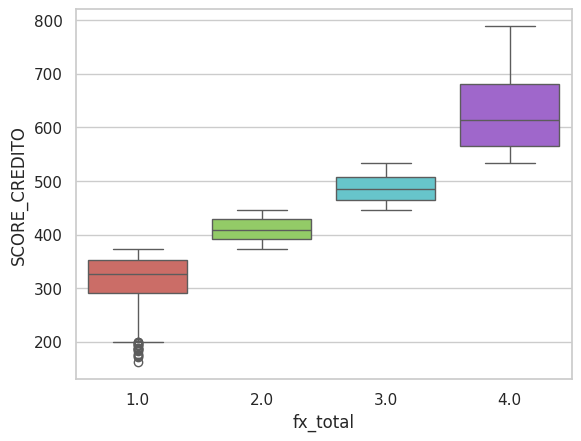

In [ ]:
# Boxplot da variável SCORE_CREDITO versus a variável categoria de trabalha

sns.boxplot(x='fx_total', y='SCORE_CREDITO', data=base_sem_outliers, palette='hls')